### 01. How to define numpy,matplotlib and tensorflow?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

### 02. How to load MNIST dataset?

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

### 03. How to normalize?

In [5]:
x_train = x_train/np.float(np.max(x_train))
x_test = x_test/np.float(np.max(x_test))

In [6]:
type(x_train)

numpy.ndarray

### 04. How to reshape from 3 dimension to 4 dimension?(number,x,y,rgb)

In [7]:
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [8]:
print(x_train.shape , x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 05. How to define model?

In [9]:
model = tf.keras.models.Sequential()

#### 05.01. CNN for Feature Extraction

In [10]:
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='SAME',input_shape=(28,28,1),activation='relu'))

#### 05.02. Max Pooling

In [11]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='SAME'))

#### 05.03. Dropout 

In [12]:
model.add(tf.keras.layers.Dropout(0.5))

#### 05.04. Flatten()

In [13]:
model.add(tf.keras.layers.Flatten())

#### [05.05 Multi Layer Perceptron Used Xavier normal initial](https://keras.io/api/layers/initializers/#glorotnormal-class)

In [14]:
model.add(tf.keras.layers.Dense(units=10,kernel_initializer= tf.keras.initializers.GlorotNormal(),activation='softmax'))

### 06. How to define adam for optimizer?

In [15]:
adam = tf.keras.optimizers.Adam(0.01)

### 07. How to compile(not one-hot encoding) ?

In [23]:
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['acc'])

### 0. How to visualize summary?

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 31,530
Trainable params: 31,530
Non-trainable params: 0
_________________________________________________________________


### 07. How to do fitting?

In [18]:
history = model.fit(x_train,y_train,batch_size=32,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2134 - acc: 0.9347
Epoch 2/3
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1440 - acc: 0.9565
Epoch 3/3
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1353 - acc: 0.9589


In [19]:
model.predict(x_test)[0]

array([1.8246667e-10, 8.3688598e-11, 4.1398178e-07, 6.2878976e-06,
       1.8477594e-11, 4.1548587e-11, 4.9143285e-16, 9.9998868e-01,
       6.7168964e-09, 4.6369360e-06], dtype=float32)

### 08. How to draw loss graph?

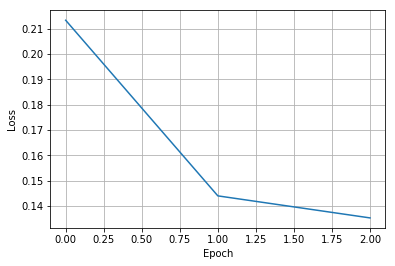

In [20]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()

### 09. How to draw accuracy graph?

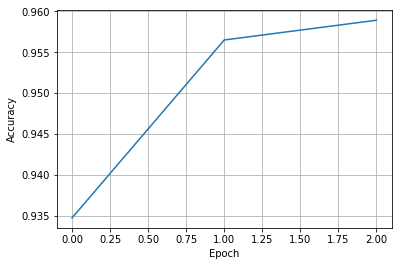

In [21]:
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()

### 10.How to evaluate ?

In [22]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06353414392042905, 0.9794]